### Good to Read
- https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
- https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

In [6]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle
import matplotlib.pyplot as plt
import cv2
from numpy import ones,vstack
from numpy.linalg import lstsq
from statistics import mean

%matplotlib inline

In [7]:
train_data = np.load('data/training_data-1.npy')
df = pd.DataFrame(train_data)
print(df.head())
print(Counter(df[1].apply(str)))

                                                   0  \
0  [[[238, 204, 171], [246, 231, 216], [69, 54, 3...   
1  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
2  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   
3  [[[238, 204, 171], [246, 231, 216], [70, 58, 4...   
4  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   

                             1  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 320, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 59, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 48, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 19, '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 17, '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 17, '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 10, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 10})


In [8]:
key_map = {
    'W': [1, 0, 0, 0, 0, 0, 0, 0, 0],
    'S': [0, 1, 0, 0, 0, 0, 0, 0, 0],
    'A': [0, 0, 1, 0, 0, 0, 0, 0, 0],
    'D': [0, 0, 0, 1, 0, 0, 0, 0, 0],
    'WA': [0, 0, 0, 0, 1, 0, 0, 0, 0],
    'WD': [0, 0, 0, 0, 0, 1, 0, 0, 0],
    'SA': [0, 0, 0, 0, 0, 0, 1, 0, 0],
    'SD': [0, 0, 0, 0, 0, 0, 0, 1, 0],
    'NK': [0, 0, 0, 0, 0, 0, 0, 0, 1],
    'default': [0, 0, 0, 0, 0, 0, 0, 0, 0],
}

In [9]:
def show_saved_data(idx):
    plt.figure()
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(train_data[idx][0], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgb_img)
    print(train_data[idx][1])

def get_rgb_img(img, title=None):
    plt.figure()
    
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if title:
        plt.title(title)
    imgplot = plt.imshow(rgb_img)
    return rgb_img

def show_rgb_img(img, title=None):
    get_rgb_img(img, title)

def show_raw_img(img, title=None):
    plt.figure()
    plt.axis("off")
    if title:
        plt.title(title)
    imgplot = plt.imshow(img)
    #plt.colorbar()  

def get_saved_data(idx):
    return train_data[idx][0].copy(),train_data[idx][1].copy()

[1, 0, 0, 0, 0, 0, 0, 0, 0]


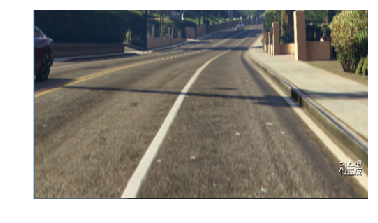

In [10]:
show_saved_data(1)

In [11]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [12]:
?cv2.line

In [13]:
def draw_lines(img,lines):
    for line in lines:
        coords = line[0]
        cv2.line(img, (coords[0], coords[1]), (coords[2], coords[3]), [255,255,255], 8)

array([[[286,  36, 345,  31]],

       [[ 61,  57, 111,  53]],

       [[393, 112, 479, 179]],

       [[384, 123, 461, 200]],

       [[  3,  56,   3,   0]],

       [[417, 122, 479, 164]],

       [[319,  65, 427, 180]],

       [[316,  63, 443, 200]],

       [[ 85,  53, 143,  49]],

       [[130,  44, 166,  42]],

       [[398, 112, 479, 171]],

       [[363,  89, 471, 176]],

       [[  2, 200,   2,   0]],

       [[  1, 200,   1,   0]],

       [[374, 127, 442, 200]],

       [[396, 114, 477, 175]],

       [[421, 127, 478, 167]],

       [[111,  50, 154,  46]],

       [[397, 112, 461, 161]],

       [[151, 200, 235,  65]],

       [[273,  23, 309,  21]],

       [[195, 151, 229,  82]],

       [[171, 194, 225,  88]],

       [[430, 132, 479, 165]],

       [[367, 107, 442, 185]],

       [[168, 200, 194, 151]],

       [[153, 200, 188, 143]],

       [[404, 144, 459, 200]],

       [[180, 150, 208, 104]],

       [[399, 101, 472, 102]]], dtype=int32)

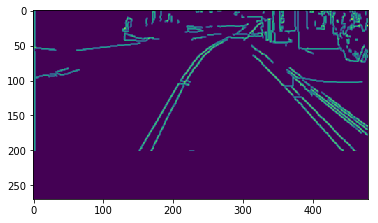

In [14]:
img, action = get_saved_data(10)
processed_img = cv2.Canny(img, threshold1=200, threshold2=300)
#processed_img = cv2.Canny(gray_img, threshold1=200, threshold2=300)
processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
processed_img = roi(processed_img, [vertices])
lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
plt.imshow(processed_img)    
lines

## color exctraction

In [15]:
#https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html
#https://stackoverflow.com/questions/21737613/image-of-hsv-color-wheel-for-opencv
org_img = train_data[1][0]
while(1):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)

    # define range of yellow color in HSV
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45,255,255])

    lower_white = np.array([0, 0, 0])
    upper_white = np.array([100,0,255])
    
    
    
    # Threshold the HSV image to get only blue colors
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)
    
    # Bitwise-AND mask and original image
    res_yellow = cv2.bitwise_and(org_img,org_img, mask= yellow_mask)
    res1_white = cv2.bitwise_and(org_img,org_img, mask= white_mask)
    cv2.imshow('org',org_img)
    cv2.imshow('yellow_mask',yellow_mask)
    cv2.imshow('yellow',res_yellow)
    cv2.imshow('white',res1_white)
    
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [16]:
def display_image_win(pos,img):
    cv2.imshow(pos, img)

def destroy_win():    
    while True:
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

In [17]:
org_img = train_data[1][0]
#while(1):

def extract_with_yellowBGR(org_img):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)

    # define range of yellow color in HSV
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45,255,255])

    lower_white = np.array([0, 0, 0])
    upper_white = np.array([100,0,255])



    # Threshold the HSV image to get only blue colors
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)

    # Bitwise-AND mask and original image
    res_yellow = cv2.bitwise_and(org_img,org_img, mask= yellow_mask)
    res1_white = cv2.bitwise_and(org_img,org_img, mask= white_mask)
    
    return res_yellow



In [18]:
org_img = train_data[1][0]
res_yellow=extract_with_yellowBGR(org_img)
display_image_win('yellow',res_yellow)
destroy_win()

## color clustering
- https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/

In [19]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

In [20]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
    # return the bar chart
    return bar

In [21]:
from sklearn.cluster import KMeans

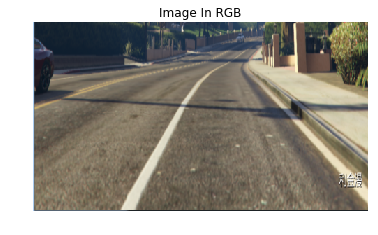

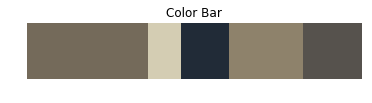

In [22]:
org_img = train_data[1][0]
rgb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
show_raw_img(rgb_img,'Image In RGB')

shaped_image = rgb_img.reshape((rgb_img.shape[0] * rgb_img.shape[1], 3))

clt = KMeans(n_clusters = 5)
clt.fit(shaped_image)
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
show_raw_img(bar,'Color Bar')

https://blog.danielparker.com.au/background-colour-detection-using-opencv-and-python-22ed8655b243

## counter most_common 
https://github.com/python/cpython/blob/3.6/Lib/heapq.py
```python
    def most_common(self, n=None):
        '''List the n most common elements and their counts from the most
        common to the least.  If n is None, then list all element counts.
        >>> Counter('abcdeabcdabcaba').most_common(3)
        [('a', 5), ('b', 4), ('c', 3)]
        '''
        # Emulate Bag.sortedByCount from Smalltalk
        if n is None:
            return sorted(self.iteritems(), key=_itemgetter(1), reverse=True)
        return _heapq.nlargest(n, self.iteritems(), key=_itemgetter(1))

```

In [23]:
print(Counter({(1,2,3):[32,[(3,4),(2,4),(2,4),(2,4)]],(2,2,3):[33,[(3,4),(2,4)]],(2,44,3):[133,[(3,4),(2,4)]]}).most_common(2))

[((2, 44, 3), [133, [(3, 4), (2, 4)]]), ((2, 2, 3), [33, [(3, 4), (2, 4)]])]


In [47]:
from collections import Counter
def count_color(width, height,image):
    manual_count={}
    for y in range(0, width):
        for x in range(0,height):
            rgb = (image[x,y,2],image[x,y,1],image[x,y,0])
            if rgb in manual_count:
                manual_count[rgb][0] +=1
                manual_count[rgb][1].append((x,y))
            else:
                manual_count[rgb] =[1,[(x,y)]]
    number_counter = Counter(manual_count).most_common(6)                
    return manual_count, number_counter

In [46]:
def draw_colors_rgb(colors):
    square_rgb={}
    fig = plt.figure()
    fig.suptitle('RGB Color')
    counter = 231
    for color in colors:        
        square = np.zeros((50, 50, 3), dtype = "uint8")
        square = cv2.rectangle(square, (int(0), 0), (int(50),50),
                               np.array(color[0],dtype = "uint8").tolist(), -1)
        subplot=plt.subplot(counter)  
        subplot.imshow(square)
        subplot.set_title(str(color[0]))
        subplot.axis("off")        
        counter = counter+1
    plt.show()

In [25]:
def draw_colors(colors):
    square_rgb={}
    fig = plt.figure()
    fig.suptitle('RGB Color')
    counter = 231
    for color in colors:        
        square = np.zeros((50, 50, 3), dtype = "uint8")
        square = cv2.rectangle(square, (int(0), 0), (int(50),50),
                               np.array(color[0][::-1],dtype = "uint8").tolist(), -1)
        subplot=plt.subplot(counter)  
        subplot.imshow(square)
        subplot.set_title(str(color[0][::-1]))
        subplot.axis("off")        
        counter = counter+1
    plt.show()          

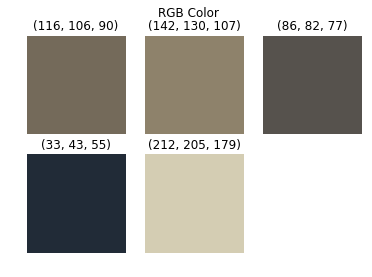

In [26]:
height, width, channels = bar.shape
all_count, top_three = count_color(width, height,bar)
#show_raw_img(bar)
colors = draw_colors(top_three)
#print("image ", height, width,channels)

## find a proper threashold for canny edge

In [27]:
def nothing(x):
    pass

In [28]:
img_noblur = train_data[1][0]
#img = cv2.blur(img_noblur, (7,7))
gray_img = cv2.cvtColor(img_noblur, cv2.COLOR_BGR2GRAY)   
canny_edge = cv2.Canny(gray_img, 0, 0)
cv2.imshow('org', img_noblur) 
cv2.imshow('gray', gray_img) 
cv2.imshow('canny_edge', canny_edge)
cv2.createTrackbar('min_value','canny_edge',0,500,nothing)
cv2.createTrackbar('max_value','canny_edge',0,500,nothing)
 
while(1):
    cv2.imshow('canny_edge', canny_edge)
    #p_img = cv2.GaussianBlur(canny_edge, (3,3), 0 )  
    #cv2.imshow('after gaussian', p_img)

    min_value = cv2.getTrackbarPos('min_value', 'canny_edge')
    max_value = cv2.getTrackbarPos('max_value', 'canny_edge')
    
    if cv2.waitKey(0) & 0xFF == ord('r'):
        canny_edge = cv2.Canny(gray_img, threshold1=min_value,threshold2=max_value)
        print("set min to ", min_value,  "set max to", max_value)
        
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
    

## canny to dectct the edge

In [29]:
#https://henrydangprg.com/2016/12/11/canny-edge-detection-in-python-with-opencv/
def detect_edge(rgb_image):
    gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)   
    #processed_img = cv2.Canny(rgb_image, threshold1=200, threshold2=300)
    #processed_img = cv2.Canny(gray_img, threshold1=130, threshold2=226)
    processed_img = cv2.Canny(gray_img, threshold1=77, threshold2=158)    
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )
    #vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
    #processed_img = roi(processed_img, [vertices])
    #plt.imshow(processed_img)    
    
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
    #print(lines)
    #draw_lines(processed_img,lines)    
    return processed_img, lines

In [30]:
img, action = get_saved_data(1)
display_image_win('window',img)
# use detect_edge is so easy!!!
new_screen, hlines= detect_edge(img)
#display_image_win('window2',gray_img)
display_image_win('window2',new_screen)
draw_lines(new_screen,hlines)
display_image_win('window3',new_screen)
#cv2.circle(original_image,(480,270),10,[255,0,0])
destroy_win()

In [31]:
new_screen.shape

(270, 480)

## generate line mask in GRAY

In [32]:
def draw_mask_image(img, lines=None):
    nrows, ncolums = img.shape
    canvans = np.zeros((nrows, ncolums, 3), dtype = "uint8")
    canvans = cv2.rectangle(canvans, (int(0), 0), (int(nrows),ncolums),
                               np.array((0,0,0),dtype = "uint8").tolist(), -1)
    return cv2.cvtColor(canvans, cv2.COLOR_BGR2GRAY)

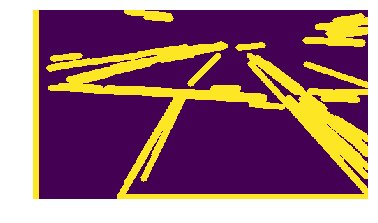

In [33]:
mask_img = draw_mask_image(new_screen)
draw_lines(mask_img,hlines)
show_raw_img(mask_img)

image  270 480 3


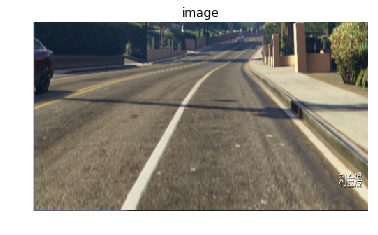

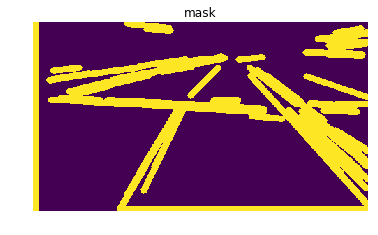

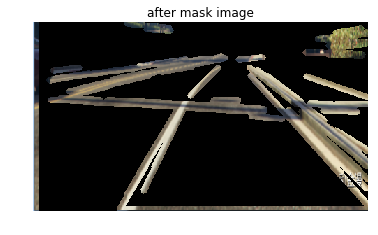

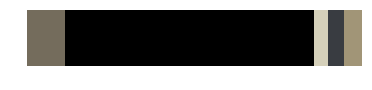

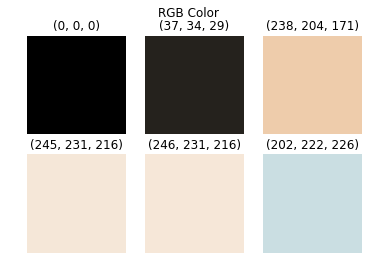

In [34]:
#https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/
show_rgb_img(img, "image")

ret, mask = cv2.threshold(mask_img, 10, 255, cv2.THRESH_BINARY)
show_raw_img(mask_img, "mask")

img2_fg = cv2.bitwise_and(img,img,mask = mask)

rgb_img = get_rgb_img(img2_fg,"after mask image")

shaped_image = rgb_img.reshape((rgb_img.shape[0] * rgb_img.shape[1], 3))

clt = KMeans(n_clusters = 5)
clt.fit(shaped_image)
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
show_raw_img(bar)

#try_img=bar
#try_img= try_img.astype(np.uint8)

height, width, channels = rgb_img.shape
print("image ", height, width, channels)
all_count,top_colors = count_color(width, height, img2_fg)
colors = draw_colors(top_colors)

In [39]:
res_yellow=extract_with_yellowBGR(img2_fg)
display_image_win('yellow',res_yellow)
destroy_win()

In [43]:
height

270

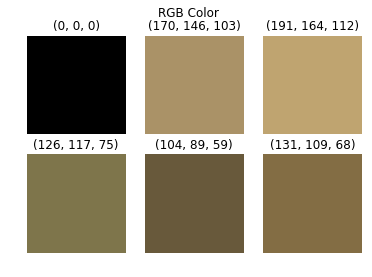

In [48]:
all_count,top_colors = count_color(width, height, res_yellow)
colors = draw_colors_rgb(top_colors)

In [50]:
all_count[(191,164,112)]

[2, [(102, 64), (101, 67)]]

In [ ]:
def draw_lanes(img, lines, color=[0, 255, 255], thickness=3):

    # if this fails, go with some default line
    try:
        # finds the maximum y value for a lane marker 
        # (since we cannot assume the horizon will always be at the same point.)

        ys = []  
        for i in lines:
            for ii in i:
                ys += [ii[1],ii[3]]
        #print(lines)
        min_y = min(ys)
        max_y = 270
        mid_y = 200
        new_lines = []
        line_dict = {}

        for idx,i in enumerate(lines):
            for xyxy in i:
                # These four lines:
                # modified from http://stackoverflow.com/questions/21565994/method-to-return-the-equation-of-a-straight-line-given-two-points
                # Used to calculate the definition of a line, given two sets of coords.
                x_coords = (xyxy[0],xyxy[2])
                y_coords = (xyxy[1],xyxy[3])
                A = vstack([x_coords,ones(len(x_coords))]).T
                m, b = lstsq(A, y_coords)[0]

                # Calculating our new, and improved, xs
                x1 = (min_y-b) / m
                x2 = (max_y-b) / m

                line_dict[idx] = [m,b,[int(x1), min_y, int(x2), max_y]]
                new_lines.append([int(x1), min_y, int(x2), max_y])

        final_lanes = {}

        for idx in line_dict:
            final_lanes_copy = final_lanes.copy()
            m = line_dict[idx][0]
            b = line_dict[idx][1]
            line = line_dict[idx][2]
            
            if len(final_lanes) == 0:
                final_lanes[m] = [ [m,b,line] ]
                
            else:
                found_copy = False

                for other_ms in final_lanes_copy:
                    if not found_copy:
                        if abs(other_ms*1.2) > abs(m) > abs(other_ms*0.8):
                            if abs(final_lanes_copy[other_ms][0][1]*1.2) > abs(b) > abs(final_lanes_copy[other_ms][0][1]*0.8):
                                final_lanes[other_ms].append([m,b,line])
                                found_copy = True
                                break
                        else:
                            final_lanes[m] = [ [m,b,line] ]

        line_counter = {}

        for lanes in final_lanes:
            line_counter[lanes] = len(final_lanes[lanes])

        top_lanes = sorted(line_counter.items(), key=lambda item: item[1])[::-1][:2]
        
        #print(top_lanes)
        lane1_id = top_lanes[0][0]
        lane2_id = top_lanes[1][0]

        def average_lane(lane_data):
            x1s = []
            y1s = []
            x2s = []
            y2s = []
            for data in lane_data:
                x1s.append(data[2][0])
                y1s.append(data[2][1])
                x2s.append(data[2][2])
                y2s.append(data[2][3])
            return int(mean(x1s)), int(mean(y1s)), int(mean(x2s)), int(mean(y2s))

        l1_x1, l1_y1, l1_x2, l1_y2 = average_lane(final_lanes[lane1_id])
        l2_x1, l2_y1, l2_x2, l2_y2 = average_lane(final_lanes[lane2_id])

        return [l1_x1, l1_y1, l1_x2, l1_y2], [l2_x1, l2_y1, l2_x2, l2_y2]
    except Exception as e:
        print(str(e))

In [ ]:
abs(-39)
#cv2.circle?

In [ ]:
def display_lanes(rgb_image):
    original_image = rgb_image   
    #gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
    processed_img = cv2.Canny(rgb_image, threshold1=200, threshold2=300)
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
    vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
    processed_img = roi(processed_img, [vertices])
#    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, 20, 15)
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
    
    try:
        l1, l2 = draw_lanes(original_image,lines,1)
        cv2.line(original_image, (l1[0], l1[1]), (l1[2], l1[3]), [0,255,0], 10)
        cv2.line(original_image, (l2[0], l2[1]), (l2[2], l2[3]), [0,255,0], 10)
        cv2.circle(original_image,(480,270),10,[255,0,0])
        for xyxy in lines:
            
#         print('line 1 point1 = ',l1[0],l1[1])
#         print('line 2 point1 = ',l2[0],l2[1])
#         print('line 1 point2 = ',l1[2],l1[3])
#         print('line 2 point2 = ',l2[2],l2[3])
        #cv2.circle(original_image,(l2[2],l2[3]),10,[0,255,0])
    except Exception as e:
        print(str(e))
        pass
    try:
        for coords in lines:
            coords = coords[0]
            try:
                cv2.line(processed_img, (coords[0], coords[1]), (coords[2], coords[3]), [255,0,0], 3)
            except Exception as e:
                print(str(e))
    except Exception as e:
        print(str(e))
    
    return original_image, processed_img

<img src='./image/find_lane.png',width=500>
* 左上 x,y=(0,0)
* 左下 (0,270)
* 右上 (480,0)
* 右下 (480,270)

In [ ]:
img, action = get_saved_data(13)
original_image = img   
#gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
processed_img = cv2.Canny(img, threshold1=200, threshold2=300)
processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
processed_img = roi(processed_img, [vertices])
#    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, 20, 15)
lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
print(lines)
display_image_win('window',img)
org_screen, new_screen= display_lanes(img)
display_image_win('window2',new_screen)
display_image_win('window3',org_screen)

destroy_win()